In [31]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Avoid OOM errors by limiting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
# remove unqualified images from dataset
data_dir = 'data'
image_exts = ['jpg', 'jpeg', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # if image is corrupted, remove it
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # if image extension is not in image_exts, remove it
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print(e)
            os.remove(image_path)
        if img is None:
            os.remove(image_path)


In [34]:
# load data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 277 files belonging to 2 classes.


In [35]:
# This allows us to iterate over the dataset
data_iterator = data.as_numpy_iterator()

In [39]:
# This grabs the next batch of data
batch = data_iterator.next() # a tuple of (images, labels)

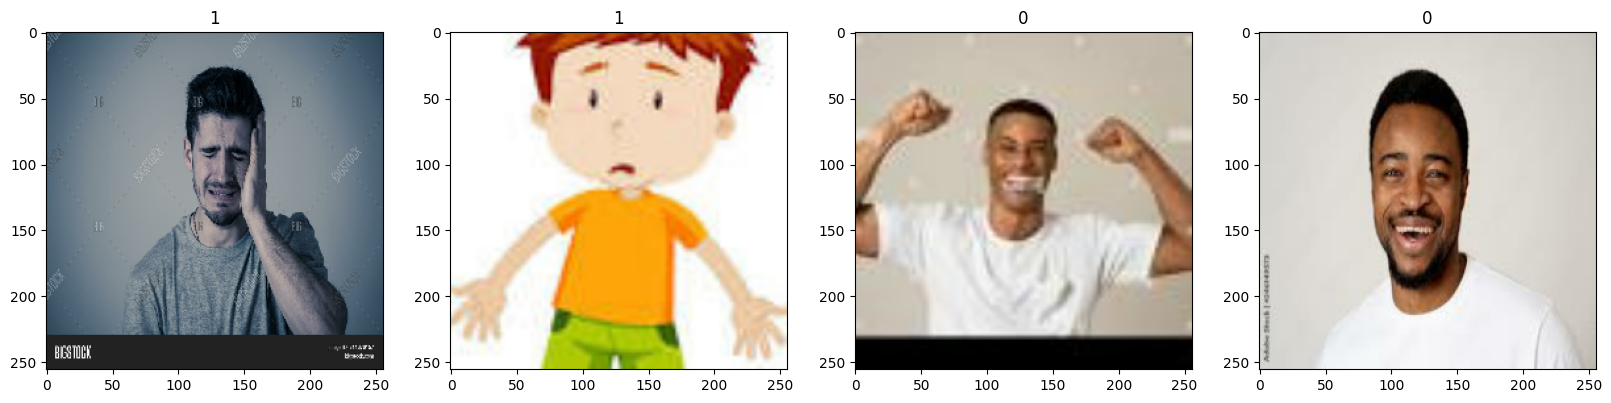

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].set_title(batch[1][idx])

In [41]:
# Preprocess data

# scale images to [0, 1], smaller is better for training
data = data.map(lambda x,y: (x/255.0 # x is the image
                             , y) # y is the label
                             ) # map is a lot faster than for loop


255.0